$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/diar.bathish/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-9 Python-3.8.12 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Look at the inference results and answer the question below.


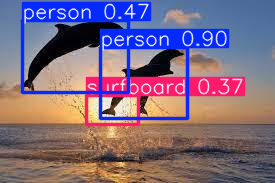

Total pixel count (image): 50325
Object person has 6177 pixels in its bounding box
Object person has 7632 pixels in its bounding box
Object surfboard has 1508 pixels in its bounding box


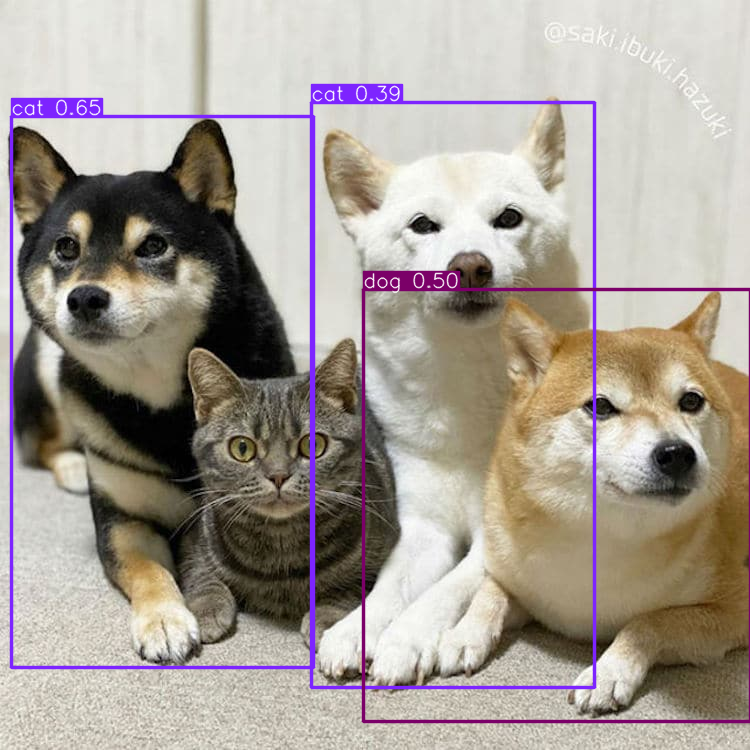

Total pixel count (image): 562500
Object cat has 166402 pixels in its bounding box
Object dog has 167184 pixels in its bounding box
Object cat has 165555 pixels in its bounding box


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch

def print_fun(shape, df):
    print("Total pixel count (image):", shape[0] * shape[1])
    bitMap = np.ones((shape[1], shape[0]))
    for _, f in df.iterrows():
        boxPixelCount = (int(f['xmax']) - int(f['xmin'])) * (int(f['ymax']) - int(f['ymin']))
        print("Object {} has {} pixels in its bounding box".format(f['name'], boxPixelCount))
        bitMap[int(f['xmin']):int(f['xmax']),int(f['ymin']):int(f['ymax'])] = 0

with torch.no_grad():
    for img in [img1, img2]:
        out = model(img)
        out.show()
        df = out.pandas().xyxy[0]
        shape = cv2.imread(img).shape
        print_fun(shape, df)


### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures? with what confidance?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.
3. recall that we learned how to fool a model by adverserial attack (PGD), describe how you would attack an Object Detection model (such as YOLO).

In [8]:
from cs236781.answers import display_answer
import hw2.answers
display_answer(hw2.answers.part6_q1)



**Answer:**
1.  In the first pic the model didn't get anything right, it recognized two dolphins as persons and the tail of another one as a surfboard.
    For one 'person' it was 90% confident, but for the others it was less than 50% confident.
    For the second image it also didn't do well, although it recognized that there are cats and dogs, 
    it classified two dogs as cats and one dog as a dog, but the bounnding box included another dog.  
    For all of them it was less than 70% confident.
    
2.  The model could have limited appility to capture are recognize complex patterns in pictures.
    Also, it could be that the model didn't have a good training, for example, getting trained on a training set that isn't diverse,
    more specifically, a training set that dosen't have many types pf dogs or dolphins.
    
    As for a solution, we can train the model on much more data and many more diverse pictures, 
    and maybe switch to a better model that dosen't have limitations like YOLOv5 might have.
    
3.  



## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

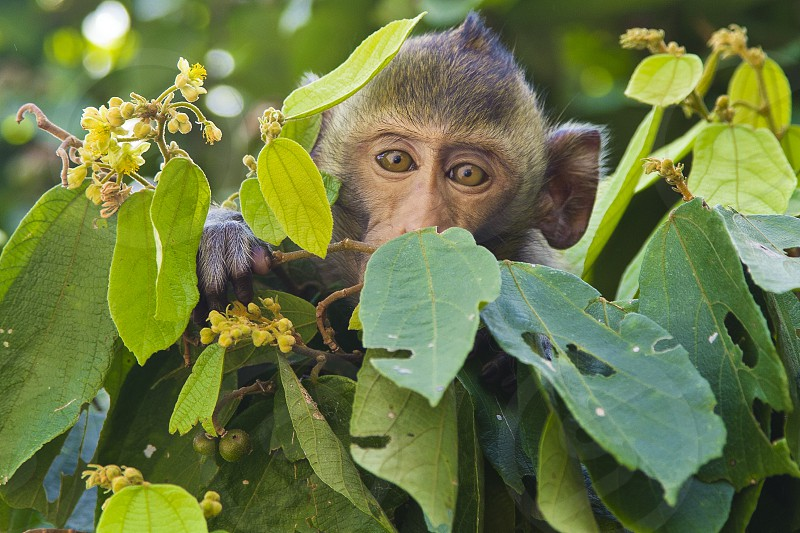

Total pixel count (image): 426400


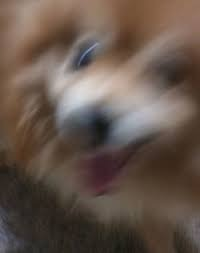

Total pixel count (image): 50600


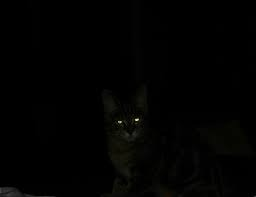

Total pixel count (image): 50432


In [4]:
#Insert the inference code here.
with torch.no_grad():
    for img in ["imgs/monkey.jpg", "imgs/dog.jpg", "imgs/cat.jpg"]:
        output = model(img)
        output.show()
        df = output.pandas().xyxy[0]
        print_fun(cv2.imread(img).shape, df)


### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [5]:
display_answer(hw2.answers.part6_q3)



**Answer:**
The model didn't do well at all, as it couldn't detect anything.
- For the first pic, the problem probably is that the leaves are apstracting the face of the monkey, making it hard to understand what is there in the pic.
- For the second one, the problem is for sure the blurry face and background.
- And for the last pic, the problem is the lighting for sure, as the model most definitely didn't see that cat there.


## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

In [6]:
#insert bonus code here

In [7]:
display_answer(hw2.answers.part6_bonus)



**Your answer:**


Write your answer using **markdown** and $\LaTeX$:
```python
# A code block
a = 2
```
An equation: $e^{i\pi} -1 = 0$

